In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [329]:
# 데이터 로드
offerings = pd.read_csv("./offerings.csv")
reviews = pd.read_csv("./reviews.csv")

# offerings

In [4]:
offerings.head()

,hotel_class,region_id,url,phone,details,address,type,id,name
0,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '147 West 4...",hotel,113317,Casablanca Hotel Times Square
1,5.0,32655,http://www.tripadvisor.com/Hotel_Review-g32655...,NaN,NaN,"{'region': 'CA', 'street-address': '300 S Dohe...",hotel,76049,Four Seasons Hotel Los Angeles at Beverly Hills
2,3.5,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '790 Eighth...",hotel,99352,Hilton Garden Inn Times Square
3,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '152 West 5...",hotel,93589,The Michelangelo Hotel
4,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,NaN,NaN,"{'region': 'NY', 'street-address': '130 West 4...",hotel,217616,The Muse Hotel New York


In [5]:
offerings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4333 entries, 0 to 4332
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hotel_class  3141 non-null   float64
 1   region_id    4333 non-null   int64  
 2   url          4333 non-null   object 
 3   phone        0 non-null      float64
 4   details      0 non-null      float64
 5   address      4333 non-null   object 
 6   type         4333 non-null   object 
 7   id           4333 non-null   int64  
 8   name         4333 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 304.8+ KB


- phone, details 값 없음 -> 제거 

In [9]:
# 결측치
offerings.isnull().sum()

hotel_class    1192
region_id         0
url               0
phone          4333
details        4333
address           0
type              0
id                0
name              0
dtype: int64

- hotel_class 결측치 처리 방법 고민 필요

In [14]:
offerings.nunique()

hotel_class       9
region_id        25
url            4333
phone             0
details           0
address        4325
type              1
id             4333
name           4254
dtype: int64

- address, name에 중복값 존재

## hotel_class

In [18]:
sorted(offerings["hotel_class"].unique())

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, nan]

In [25]:
offerings["hotel_class"].value_counts()

2.0    753
3.0    746
2.5    631
3.5    405
4.0    394
5.0     72
1.5     67
4.5     61
1.0     12
Name: hotel_class, dtype: int64

<AxesSubplot:ylabel='Frequency'>

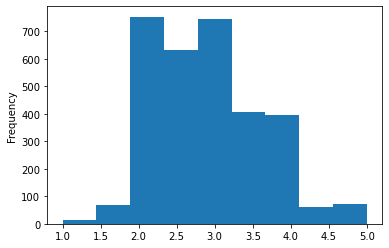

In [138]:
offerings["hotel_class"].plot.hist(bins=9)

## type

In [29]:
offerings["type"].unique()

array(['hotel'], dtype=object)

- 제거해도 무방할 듯

## 컬럼 제거

In [332]:
offerings.drop(columns=["phone","details","type"], inplace=True)
offerings

,hotel_class,region_id,url,address,id,name
0,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,"{'region': 'NY', 'street-address': '147 West 4...",113317,Casablanca Hotel Times Square
1,5.0,32655,http://www.tripadvisor.com/Hotel_Review-g32655...,"{'region': 'CA', 'street-address': '300 S Dohe...",76049,Four Seasons Hotel Los Angeles at Beverly Hills
2,3.5,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,"{'region': 'NY', 'street-address': '790 Eighth...",99352,Hilton Garden Inn Times Square
3,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,"{'region': 'NY', 'street-address': '152 West 5...",93589,The Michelangelo Hotel
4,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,"{'region': 'NY', 'street-address': '130 West 4...",217616,The Muse Hotel New York
...,...,...,...,...,...,...
4328,5.0,28970,http://www.tripadvisor.com/Hotel_Review-g28970...,"{'region': 'DC', 'street-address': '1201 24th ...",84090,Park Hyatt Washington
4329,5.0,28970,http://www.tripadvisor.com/Hotel_Review-g28970...,"{'region': 'DC', 'street-address': '2800 Penns...",84065,Four Seasons Washington D.C.
4330,4.0,28970,http://www.tripadvisor.com/Hotel_Review-g28970...,"{'region': 'DC', 'street-address': '2121 P Str...",84093,"Palomar Washington DC, a Kimpton Hotel"
4331,4.5,28970,http://www.tripadvisor.com/Hotel_Review-g28970...,"{'region': 'DC', 'street-address': '806 15th S...",235513,Sofitel Washington DC


## address

In [54]:
(offerings["address"].value_counts() > 1).sum()

8

In [76]:
offerings["address"].value_counts()

{'region': 'AZ', 'street-address': '9425 North Black Canyon Freeway', 'postal-code': '85021', 'locality': 'Phoenix'}      2
{'region': 'NY', 'street-address': '306 W 94th St', 'postal-code': '10025', 'locality': 'New York City'}                  2
{'region': 'NY', 'locality': 'New York City'}                                                                             2
{'region': 'NY', 'street-address': '1335 Avenue of the Americas', 'postal-code': '10019', 'locality': 'New York City'}    2
{'region': 'IN', 'street-address': '601 West Washington Street', 'postal-code': '46204', 'locality': 'Indianapolis'}      2
                                                                                                                         ..
{'region': 'CA', 'street-address': '1546 2nd Avenue', 'postal-code': '92101', 'locality': 'San Diego'}                    1
{'region': 'CA', 'street-address': '9888 Mira Mesa Blvd', 'postal-code': '92131', 'locality': 'San Diego'}                1
{'region

In [102]:
same_address = offerings[offerings.duplicated(subset="address", keep=False)]
same_address.sort_values("address")

,hotel_class,region_id,url,address,id,name
2099,2.5,31310,http://www.tripadvisor.com/Hotel_Review-g31310...,"{'region': 'AZ', 'street-address': '9425 North...",239947,TownePlace Suites Phoenix Metrocenter Mall
2105,3.0,31310,http://www.tripadvisor.com/Hotel_Review-g31310...,"{'region': 'AZ', 'street-address': '9425 North...",262398,SpringHill Suites Phoenix North
2462,3.0,60805,http://www.tripadvisor.com/Hotel_Review-g60805...,"{'region': 'FL', 'street-address': '1201 Kings...",1450901,Homewood Suites by Hilton Jacksonville Downtow...
2466,3.0,60805,http://www.tripadvisor.com/Hotel_Review-g60805...,"{'region': 'FL', 'street-address': '1201 Kings...",1450903,Hilton Garden Inn Jacksonville Downtown/Southbank
946,3.5,35805,http://www.tripadvisor.com/Hotel_Review-g35805...,"{'region': 'IL', 'street-address': '75 East Wa...",250023,River Hotel
958,NaN,35805,http://www.tripadvisor.com/Hotel_Review-g35805...,"{'region': 'IL', 'street-address': '75 East Wa...",1477545,Club Quarters Chicago -- Wacker at Michigan
3152,3.0,37209,http://www.tripadvisor.com/Hotel_Review-g37209...,"{'region': 'IN', 'street-address': '601 West W...",1479845,SpringHill Suites Indianapolis Downtown
3153,3.0,37209,http://www.tripadvisor.com/Hotel_Review-g37209...,"{'region': 'IN', 'street-address': '601 West W...",1592809,Courtyard Indianapolis Downtown
3212,2.0,49022,http://www.tripadvisor.com/Hotel_Review-g49022...,"{'region': 'NC', 'street-address': '3430 Saint...",3452538,Rodeway Inn
3216,NaN,49022,http://www.tripadvisor.com/Hotel_Review-g49022...,"{'region': 'NC', 'street-address': '3430 Saint...",94168,Motel 6 Charlotte - South


In [81]:
same_address.groupby("address").nunique()

,hotel_class,region_id,url,id,name
address,,,,,
"{'region': 'AZ', 'street-address': '9425 North Black Canyon Freeway', 'postal-code': '85021', 'locality': 'Phoenix'}",2,1,2,2,2
"{'region': 'FL', 'street-address': '1201 Kings Avenue', 'postal-code': '32207', 'locality': 'Jacksonville'}",1,1,2,2,2
"{'region': 'IL', 'street-address': '75 East Wacker Drive', 'postal-code': '60601', 'locality': 'Chicago'}",1,1,2,2,2
"{'region': 'IN', 'street-address': '601 West Washington Street', 'postal-code': '46204', 'locality': 'Indianapolis'}",1,1,2,2,2
"{'region': 'NC', 'street-address': '3430 Saint Vardell Lane', 'postal-code': '28217', 'locality': 'Charlotte'}",1,1,2,2,2
"{'region': 'NY', 'locality': 'New York City'}",1,1,2,2,2
"{'region': 'NY', 'street-address': '1335 Avenue of the Americas', 'postal-code': '10019', 'locality': 'New York City'}",1,1,2,2,2
"{'region': 'NY', 'street-address': '306 W 94th St', 'postal-code': '10025', 'locality': 'New York City'}",0,1,2,2,2


## name

In [66]:
(offerings["name"].value_counts() > 1).sum()

48

In [74]:
offerings["name"].value_counts()

Americas Best Value Inn                             9
Rodeway Inn                                         6
Econo Lodge                                         6
Comfort Suites                                      5
Budget Inn                                          4
                                                   ..
BEST WESTERN PLUS Hacienda Hotel Old Town           1
Vagabond Inn - San Diego Airport Marina             1
Courtyard by Marriott Rancho Bernardo               1
Holiday Inn Express San Diego Airport - Old Town    1
The Hay-Adams                                       1
Name: name, Length: 4254, dtype: int64

In [104]:
same_name = offerings[offerings["name"].duplicated(keep=False)]
same_name.sort_values("name")

,hotel_class,region_id,url,address,id,name
127,2.0,56003,http://www.tripadvisor.com/Hotel_Review-g56003...,"{'region': 'TX', 'street-address': '8201 South...",99031,America's Inn
286,2.0,56003,http://www.tripadvisor.com/Hotel_Review-g56003...,"{'region': 'TX', 'street-address': '10552 Sout...",107718,America's Inn
2868,NaN,30196,http://www.tripadvisor.com/Hotel_Review-g30196...,"{'region': 'TX', 'street-address': '7300 North...",98405,American Inn
3397,NaN,55857,http://www.tripadvisor.com/Hotel_Review-g55857...,"{'region': 'TX', 'street-address': '7318 Calmo...",73543,American Inn
2877,2.0,30196,http://www.tripadvisor.com/Hotel_Review-g30196...,"{'region': 'TX', 'street-address': '909 E Koen...",108988,Americas Best Value Inn
...,...,...,...,...,...,...
1422,3.0,60750,http://www.tripadvisor.com/Hotel_Review-g60750...,"{'region': 'CA', 'street-address': '1410 Rosec...",658421,The Pearl Hotel
2044,1.0,31310,http://www.tripadvisor.com/Hotel_Review-g31310...,"{'region': 'AZ', 'street-address': '4021 North...",74724,Travel Inn
1727,2.0,60956,http://www.tripadvisor.com/Hotel_Review-g60956...,"{'region': 'TX', 'street-address': '6543 West ...",491073,Travel Inn
1153,1.5,32655,http://www.tripadvisor.com/Hotel_Review-g32655...,"{'region': 'CA', 'street-address': '8525 Sepul...",271481,Travel Inn


In [82]:
same_name.groupby("name").nunique()

,hotel_class,region_id,url,address,id
name,,,,,
America's Inn,1,1,2,2,2
American Inn,0,2,2,2,2
Americas Best Value Inn,1,7,9,9,9
Anchor Motel,0,2,2,2,2
BEST WESTERN Suites,1,2,2,2,2
Blue Moon Hotel,1,2,2,2,2
Budget Inn,1,4,4,4,4
Budgetel Inn & Suites,1,2,2,2,2
Capri Motel,1,2,2,2,2


- 주소와 이름이 모두 동일한 데이터는 없었음(실제로 같았는지는 몰라도).
- address나 name 중복인 데이터도 다 다른 데이터로 생각하고 id 기준으로 판단하는 것이 좋을지?

# reviews

In [11]:
reviews.head()

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,"{'username': 'Papa_Panda', 'num_cities': 22, '...",December 2012,93338,0,2012-12-17,147643103,False
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...","{'username': 'Maureen V', 'num_reviews': 2, 'n...",December 2012,93338,0,2012-12-17,147639004,False
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great Stay”,This is a great property in Midtown. We two di...,"{'username': 'vuguru', 'num_cities': 12, 'num_...",December 2012,1762573,0,2012-12-18,147697954,False
3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,"{'username': 'Hotel-Designer', 'num_cities': 5...",August 2012,1762573,0,2012-12-17,147625723,False
4,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,"{'username': 'JamesE339', 'num_cities': 34, 'n...",December 2012,1762573,0,2012-12-17,147612823,False


In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878561 entries, 0 to 878560
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ratings            878561 non-null  object
 1   title              878561 non-null  object
 2   text               878561 non-null  object
 3   author             878561 non-null  object
 4   date_stayed        810967 non-null  object
 5   offering_id        878561 non-null  int64 
 6   num_helpful_votes  878561 non-null  int64 
 7   date               878561 non-null  object
 8   id                 878561 non-null  int64 
 9   via_mobile         878561 non-null  bool  
dtypes: bool(1), int64(3), object(6)
memory usage: 61.2+ MB


In [13]:
reviews.isnull().sum()

ratings                  0
title                    0
text                     0
author                   0
date_stayed          67594
offering_id              0
num_helpful_votes        0
date                     0
id                       0
via_mobile               0
dtype: int64

## date_stayed

In [347]:
reviews["date_stayed"].value_counts()

August 2012       28534
July 2012         28474
October 2012      27028
June 2012         25864
September 2012    25404
                  ...  
June 2000             1
November 1999         1
February 1999         1
October 1999          1
September 1999        1
Name: date_stayed, Length: 168, dtype: int64

In [348]:
list(reviews['date_stayed'].unique())

['December 2012',
 'August 2012',
 'April 2012',
 'November 2012',
 'March 2012',
 'October 2012',
 'June 2012',
 'September 2012',
 'January 2012',
 'July 2012',
 'May 2012',
 'February 2012',
 'September 2010',
 'April 2010',
 'March 2010',
 'January 2010',
 'December 2009',
 'September 2009',
 'March 2009',
 'February 2009',
 'May 2008',
 'September 2011',
 'November 2011',
 'December 2011',
 'May 2011',
 'October 2011',
 'August 2007',
 'April 2007',
 'December 2010',
 nan,
 'August 2011',
 'January 2011',
 'February 2011',
 'April 2011',
 'March 2011',
 'November 2010',
 'October 2010',
 'May 2010',
 'June 2009',
 'January 2009',
 'November 2008',
 'August 2008',
 'August 2010',
 'March 2008',
 'July 2011',
 'September 2007',
 'December 2006',
 'September 2006',
 'July 2006',
 'April 2006',
 'March 2006',
 'January 2002',
 'July 2009',
 'May 2009',
 'June 2007',
 'June 2011',
 'July 2007',
 'May 2007',
 'February 2007',
 'January 2007',
 'August 2006',
 'June 2006',
 'August 2005'

- nan값과 common_month_year0라는 값 있음

### common_month_year0

In [349]:
(reviews['date_stayed']=='common_month_year0').sum()

26

In [351]:
cmy0 = reviews[reviews['date_stayed']=='common_month_year0']
cmy0

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile
11087,"{'service': 4.0, 'cleanliness': 1.0, 'overall'...",“卫生糟糕”,第一次住hilton。卫生真糟糕。床单上好多毛。应该是没有换床单。打电话找客房服务来换。折腾...,"{'username': '', 'id': '', 'location': ''}",common_month_year0,98997,0,2012-12-02,146678821,False
80210,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“很好的酒店”,位置好。可以步行至时报广场。洛克菲勒广场。离联合国总部也不远。住的房间有三个窗户。看看纽约景...,"{'username': '', 'id': '', 'location': ''}",common_month_year0,93475,0,2012-12-02,146678834,False
89675,"{'service': 4.0, 'cleanliness': 4.0, 'overall'...",“Boutique hotel”,纽约下城区不错的一家高品质酒店。早餐的橙汁是鲜榨的，非常好喝，其他菜也很不错。房间都是朝一个...,"{'username': '', 'id': '', 'location': ''}",common_month_year0,93561,0,2012-12-14,147547018,False
131335,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“很豪华位置很好”,地点绝佳 联合国 东河 克莱斯勒大厦 中央车站近在咫尺 风景绝佳 城市天际线无论早上还是晚上...,"{'username': '', 'id': '', 'location': ''}",common_month_year0,209382,0,2012-10-14,142858611,False
136647,"{'service': 4.0, 'cleanliness': 4.0, 'overall'...",“闹市中安静的酒店”,酒店确切的说在第八大街附近，离时代广场不运，离宾州车站和港务局车站都不远。酒店短期入住没有客...,"{'username': '', 'id': '', 'location': ''}",common_month_year0,1025779,0,2012-12-02,146678930,False
183238,"{'service': 4.0, 'cleanliness': 4.0, 'overall'...",“就是华尔道夫吧 翻译不一样”,“沃道夫·阿斯多瑞亚酒店”……好吧，这是美国的翻译吗？其实就是纽约华尔道夫酒店了，占据了几乎...,"{'username': '', 'id': '', 'location': ''}",common_month_year0,93618,0,2012-11-11,145235716,False
219829,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“极致奢华,纽约首选”","位置很好,在第五大道北段西侧,55街拐角处.门口的两个石狮很有亚洲风情!服务没的说,亲切至极...","{'username': '', 'id': '', 'location': ''}",common_month_year0,113311,0,2012-10-16,143024672,False
221629,"{'service': 4.0, 'cleanliness': 4.0, 'overall'...",“印象一般的一家”,纽约文华东方和半岛相比，我还是更喜欢后者。因为这家文华东方真的不是很“文华东方”，装修看起来...,"{'username': '', 'id': '', 'location': ''}",common_month_year0,281071,0,2012-11-20,145964407,False
246842,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“交通方便性价比好”,前台超热情的，有点出乎我的意料，用point+cash换的酒店，所以不觉得贵，房间不大，st...,"{'username': '', 'id': '', 'location': ''}",common_month_year0,1465162,1,2012-10-15,142858853,False
253890,"{'service': 5.0, 'cleanliness': 4.0, 'overall'...",“位置很不错哦”,位置很好，周围有好吃的牛排馆，我很喜欢。去五大道购物也很方便，酒店布置的蛮有特色，对亚洲人也...,"{'username': '', 'id': '', 'location': ''}",common_month_year0,126260,0,2012-11-11,145235719,False


- 후기에 중국어도 있음
- 중국어 후기는 어떻게 구분할지?

In [353]:
cmy0['date'].nunique()

17

In [352]:
cmy0['date'].value_counts()

2012-12-02    4
2012-10-15    3
2012-12-04    3
2012-11-11    2
2012-12-14    2
2012-12-18    1
2012-10-24    1
2012-12-08    1
2012-10-04    1
2012-12-16    1
2012-06-12    1
2012-07-21    1
2012-04-21    1
2012-11-20    1
2012-10-16    1
2012-10-14    1
2012-12-09    1
Name: date, dtype: int64

In [376]:
# 연월 단위로 보기
cmy0['date_YM'] = cmy0['date'].map(lambda x : x[:7])

C:\Users\user\AppData\Local\Temp/ipykernel_35760/4033115512.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cmy0['date_YM'] = cmy0['date'].map(lambda x : x[:7])


In [375]:
cmy0['date_YM'].value_counts()

2012-12    13
2012-10     7
2012-11     3
2012-06     1
2012-04     1
2012-07     1
Name: date_YM, dtype: int64

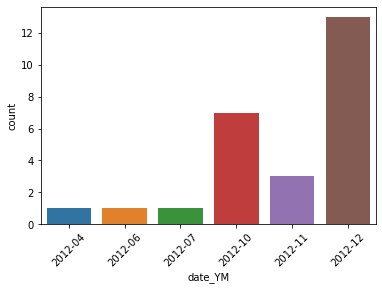

In [374]:
g = sns.countplot(data=cmy0, x='date_YM', order=sorted(cmy0['date_YM'].unique()))
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

- common_month_year0 이라는 값을 가진 리뷰들은 2012년 4월~2012년 12월 사이에 존재.
- 특히 2012년 4분기(10~12월)에 대부분 분포.

### 연월별로 확인

In [378]:
reviews.shape

(878561, 10)

In [382]:
reviews.drop(reviews[reviews['date_stayed']=='common_month_year0'].index, inplace=True)
reviews.shape

(878535, 10)

- 26개 행 삭제

In [153]:
from datetime import datetime

In [383]:
# datetime 사용
reviews["date_stayed_YM"] = pd.to_datetime(reviews["date_stayed"], format="%B %Y", errors='coerce')
reviews.head()

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,date_stayed_YM
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,"{'username': 'Papa_Panda', 'num_cities': 22, '...",December 2012,93338,0,2012-12-17,147643103,False,2012-12-01
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...","{'username': 'Maureen V', 'num_reviews': 2, 'n...",December 2012,93338,0,2012-12-17,147639004,False,2012-12-01
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great Stay”,This is a great property in Midtown. We two di...,"{'username': 'vuguru', 'num_cities': 12, 'num_...",December 2012,1762573,0,2012-12-18,147697954,False,2012-12-01
3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,"{'username': 'Hotel-Designer', 'num_cities': 5...",August 2012,1762573,0,2012-12-17,147625723,False,2012-08-01
4,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,"{'username': 'JamesE339', 'num_cities': 34, 'n...",December 2012,1762573,0,2012-12-17,147612823,False,2012-12-01


In [388]:
reviews['date_stayed_YM'] = reviews['date_stayed_YM'].map(lambda x : str(x)[:7])
reviews['date_stayed_YM']

0         2012-12
1         2012-12
2         2012-12
3         2012-08
4         2012-12
           ...   
878556        NaT
878557    2008-07
878558    2008-07
878559    2008-07
878560    2008-03
Name: date_stayed_YM, Length: 878535, dtype: object

In [394]:
period = sorted(reviews["date_stayed_YM"].unique())
period.remove('NaT')
period

['1999-01',
 '1999-02',
 '1999-04',
 '1999-05',
 '1999-06',
 '1999-07',
 '1999-08',
 '1999-09',
 '1999-10',
 '1999-11',
 '1999-12',
 '2000-01',
 '2000-02',
 '2000-03',
 '2000-04',
 '2000-05',
 '2000-06',
 '2000-07',
 '2000-08',
 '2000-09',
 '2000-10',
 '2000-11',
 '2000-12',
 '2001-01',
 '2001-02',
 '2001-03',
 '2001-04',
 '2001-05',
 '2001-06',
 '2001-07',
 '2001-08',
 '2001-09',
 '2001-10',
 '2001-11',
 '2001-12',
 '2002-01',
 '2002-02',
 '2002-03',
 '2002-04',
 '2002-05',
 '2002-06',
 '2002-07',
 '2002-08',
 '2002-09',
 '2002-10',
 '2002-11',
 '2002-12',
 '2003-01',
 '2003-02',
 '2003-03',
 '2003-04',
 '2003-05',
 '2003-06',
 '2003-07',
 '2003-08',
 '2003-09',
 '2003-10',
 '2003-11',
 '2003-12',
 '2004-01',
 '2004-02',
 '2004-03',
 '2004-04',
 '2004-05',
 '2004-06',
 '2004-07',
 '2004-08',
 '2004-09',
 '2004-10',
 '2004-11',
 '2004-12',
 '2005-01',
 '2005-02',
 '2005-03',
 '2005-04',
 '2005-05',
 '2005-06',
 '2005-07',
 '2005-08',
 '2005-09',
 '2005-10',
 '2005-11',
 '2005-12',
 '20

In [391]:
reviews['date_stayed_YM'].value_counts()

NaT        67594
2012-08    28534
2012-07    28474
2012-10    27028
2012-06    25864
           ...  
2000-06        1
1999-11        1
1999-02        1
1999-10        1
1999-09        1
Name: date_stayed_YM, Length: 168, dtype: int64

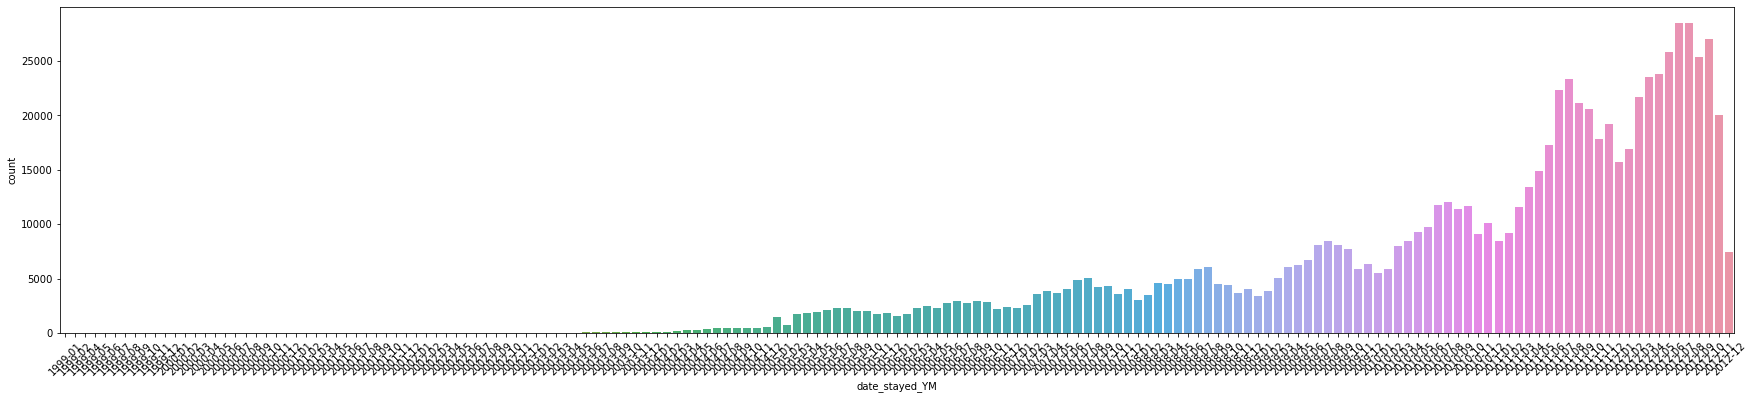

In [395]:
plt.figure(figsize=(30,6))
g = sns.countplot(data=reviews, x="date_stayed_YM", order=period)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

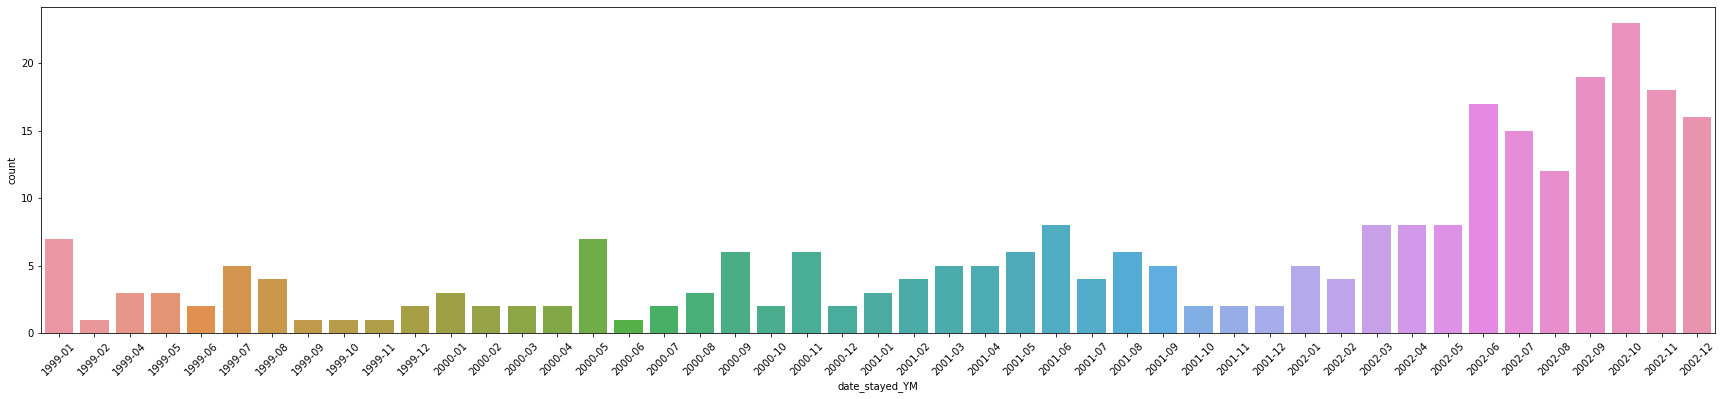

In [403]:
# 1999~2002년 데이터
plt.figure(figsize=(30,6))
g = sns.countplot(data=reviews, x="date_stayed_YM", order=period[:period.index('2003-01')])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

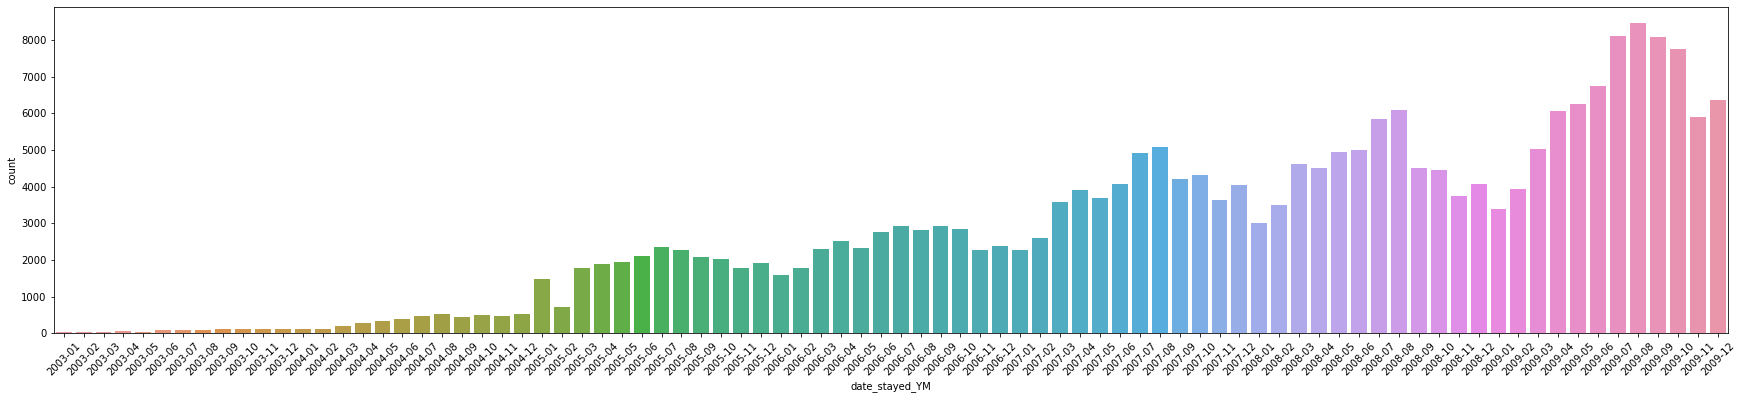

In [405]:
# 2003~2009년 데이터
plt.figure(figsize=(30,6))
g = sns.countplot(data=reviews, x="date_stayed_YM", order=period[period.index('2003-01'):period.index('2010-01')])
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

- 주기성이 보임
    - 매해 리뷰 수 증가
    - 1년 중 7,8월이 가장 많음
- 시계열 분석 해볼 수 있을 듯

### 결측치

In [424]:
reviews[reviews["date_stayed"].isnull()].head()

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,date_stayed_YM,date_YM
498,{'overall': 4.0},“Enjoyed it more this time but $40 for a Belgi...,My first time at the setai (about 6 months ago...,"{'username': 'Jenkr', 'num_cities': 8, 'num_he...",NaN,1776857,0,2012-10-24,143580847,True,NaT,2012-10
829,{'overall': 5.0},“Fabulous Dining”,"This is my second stay at the Hilton, we\nspen...","{'username': '', 'id': '', 'location': ''}",NaN,108038,1,2005-05-08,3449313,False,NaT,2005-05
875,{'overall': 3.0},“Average Hotel”,I've stayed at this hotel 3 times. Liked the l...,"{'username': '', 'id': '', 'location': ''}",NaN,108038,3,2004-08-15,2450232,False,NaT,2004-08
1063,{'overall': 5.0},"“Great tourist-class choice -- modern, clean, ...","I was visiting Houston for the first time, and...","{'username': '', 'id': '', 'location': ''}",NaN,239853,8,2005-01-18,3013808,False,NaT,2005-01
1064,{'overall': 5.0},“Minute Maid - A Nice relaxing walk from the h...,We had a nice stay at this hotel on our recent...,"{'username': 'drw2112', 'num_cities': 114, 'nu...",NaN,239853,6,2004-08-22,2481233,False,NaT,2004-08


- date_stayed 결측치 어떻게 채울지?
- date(리뷰 작성일) 기준으로 숙박일 결측치가 많은 달이 언제인지 파악

In [416]:
reviews["date_YM"] = reviews["date"].apply(lambda x : x[:7])
reviews.head()

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,date_stayed_YM,date_YM
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,"{'username': 'Papa_Panda', 'num_cities': 22, '...",December 2012,93338,0,2012-12-17,147643103,False,2012-12,2012-12
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...","{'username': 'Maureen V', 'num_reviews': 2, 'n...",December 2012,93338,0,2012-12-17,147639004,False,2012-12,2012-12
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great Stay”,This is a great property in Midtown. We two di...,"{'username': 'vuguru', 'num_cities': 12, 'num_...",December 2012,1762573,0,2012-12-18,147697954,False,2012-12,2012-12
3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,"{'username': 'Hotel-Designer', 'num_cities': 5...",August 2012,1762573,0,2012-12-17,147625723,False,2012-08,2012-12
4,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,"{'username': 'JamesE339', 'num_cities': 34, 'n...",December 2012,1762573,0,2012-12-17,147612823,False,2012-12,2012-12


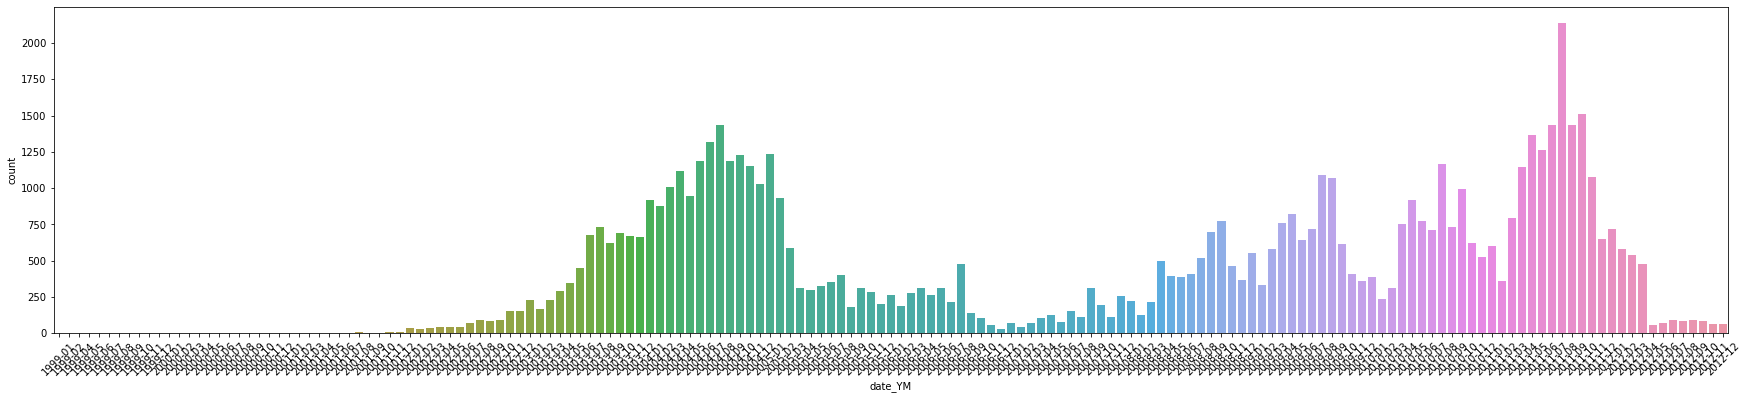

In [422]:
plt.figure(figsize=(30,6))
g = sns.countplot(data=reviews[reviews["date_stayed_YM"]=='NaT'], x="date_YM", order=period)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

In [425]:
reviews[reviews["date_stayed_YM"]=='NaT']["date_YM"].value_counts()

2011-08    2141
2011-10    1512
2004-08    1438
2011-09    1438
2011-07    1433
           ... 
2001-09       4
2001-04       4
2001-10       3
2001-03       1
2001-02       1
Name: date_YM, Length: 140, dtype: int64

- 숙박일이 결측치인 데이터가 2004년, 2011년에 많이 나왔음

### 월별 숙박일 결측치 비율

In [428]:
reviews['stayed_null'] = reviews['date_stayed'].isnull()
reviews['stayed_null'].value_counts()

False    810941
True      67594
Name: stayed_null, dtype: int64

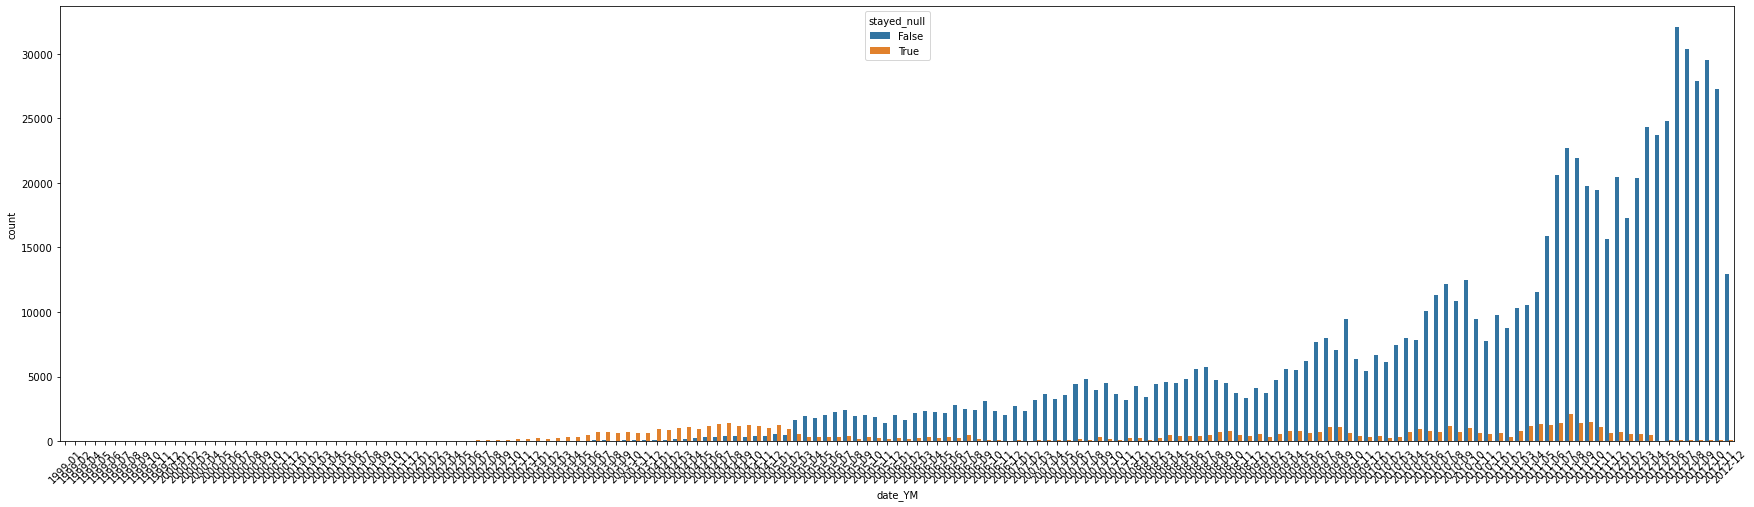

In [431]:
# 전체 데이터 중 숙박일 결측치의 비율 및 양 확인
plt.figure(figsize=(30,8))
g = sns.countplot(data=reviews, x="date_YM", order=period, hue='stayed_null')
g.set_xticklabels(g.get_xticklabels(), rotation=45)
plt.show()

## via_mobile

In [432]:
reviews['via_mobile'].value_counts()

False    832227
True      46308
Name: via_mobile, dtype: int64

In [433]:
reviews['via_mobile'].value_counts(normalize=True)

False    0.94729
True     0.05271
Name: via_mobile, dtype: float64

- 모바일을 통했는지 아닌지에 따른 평점의 차이?

## df_reviews
- 딕셔너리 펼치기

In [435]:
df_reviews = reviews.copy()
df_reviews.head()

,ratings,title,text,author,date_stayed,offering_id,num_helpful_votes,date,id,via_mobile,date_stayed_YM,date_YM,stayed_null
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,"{'username': 'Papa_Panda', 'num_cities': 22, '...",December 2012,93338,0,2012-12-17,147643103,False,2012-12,2012-12,False
1,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...","{'username': 'Maureen V', 'num_reviews': 2, 'n...",December 2012,93338,0,2012-12-17,147639004,False,2012-12,2012-12,False
2,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Great Stay”,This is a great property in Midtown. We two di...,"{'username': 'vuguru', 'num_cities': 12, 'num_...",December 2012,1762573,0,2012-12-18,147697954,False,2012-12,2012-12,False
3,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...",“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,"{'username': 'Hotel-Designer', 'num_cities': 5...",August 2012,1762573,0,2012-12-17,147625723,False,2012-08,2012-12,False
4,"{'service': 4.0, 'cleanliness': 5.0, 'overall'...",“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,"{'username': 'JamesE339', 'num_cities': 34, 'n...",December 2012,1762573,0,2012-12-17,147612823,False,2012-12,2012-12,False


In [436]:
df_reviews.drop(columns = 'date_stayed', inplace=True)
df_reviews.head(1)

,ratings,title,text,author,offering_id,num_helpful_votes,date,id,via_mobile,date_stayed_YM,date_YM,stayed_null
0,"{'service': 5.0, 'cleanliness': 5.0, 'overall'...","“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,"{'username': 'Papa_Panda', 'num_cities': 22, '...",93338,0,2012-12-17,147643103,False,2012-12,2012-12,False


In [437]:
df_reviews = dict_to_cols(df_reviews, "ratings")
df_reviews = dict_to_cols(df_reviews, "author")
df_reviews.head()

,title,text,offering_id,num_helpful_votes,date,id,via_mobile,date_stayed_YM,date_YM,stayed_null,...,ratings_location,ratings_sleep_quality,ratings_rooms,author_username,author_num_cities,author_num_helpful_votes,author_num_reviews,author_num_type_reviews,author_id,author_location
0,"“Truly is ""Jewel of the Upper Wets Side""”",Stayed in a king suite for 11 nights and yes i...,93338,0,2012-12-17,147643103,False,2012-12,2012-12,False,...,5.0,5.0,5.0,Papa_Panda,22.0,12.0,29.0,24.0,8C0B42FF3C0FA366A21CFD785302A032,Gold Coast
1,“My home away from home!”,"On every visit to NYC, the Hotel Beacon is the...",93338,0,2012-12-17,147639004,False,2012-12,2012-12,False,...,5.0,5.0,5.0,Maureen V,2.0,NaN,2.0,NaN,E3C85CA9DBBBC77E0DB534ABE93E4713,"Sydney, New South Wales, Australia"
2,“Great Stay”,This is a great property in Midtown. We two di...,1762573,0,2012-12-18,147697954,False,2012-12,2012-12,False,...,5.0,4.0,4.0,vuguru,12.0,17.0,14.0,14.0,FB1032DECE1162CB3556D05F278AAFFD,Houston
3,“Modern Convenience”,The Andaz is a nice hotel in a central locatio...,1762573,0,2012-12-17,147625723,False,2012-08,2012-12,False,...,5.0,5.0,5.0,Hotel-Designer,5.0,26.0,5.0,5.0,EC3E275EE7590694889C8C7EE0D13961,"Laguna Beach, CA"
4,“Its the best of the Andaz Brand in the US....”,I have stayed at each of the US Andaz properti...,1762573,0,2012-12-17,147612823,False,2012-12,2012-12,False,...,5.0,5.0,5.0,JamesE339,34.0,65.0,104.0,49.0,BA524A238B1171206691A6CC3F28F266,"Saint Louis, Missouri"


In [439]:
df_reviews.columns

Index(['title', 'text', 'offering_id', 'num_helpful_votes', 'date', 'id',
       'via_mobile', 'date_stayed_YM', 'date_YM', 'stayed_null',
       'ratings_service', 'ratings_cleanliness', 'ratings_overall',
       'ratings_value', 'ratings_location', 'ratings_sleep_quality',
       'ratings_rooms', 'author_username', 'author_num_cities',
       'author_num_helpful_votes', 'author_num_reviews',
       'author_num_type_reviews', 'author_id', 'author_location'],
      dtype='object')

## rating

### overall

In [443]:
df_reviews['ratings_overall'].value_counts()

5.0    348308
4.0    293718
3.0    122561
2.0     60084
1.0     53847
0.0        17
Name: ratings_overall, dtype: int64

<AxesSubplot:ylabel='Frequency'>

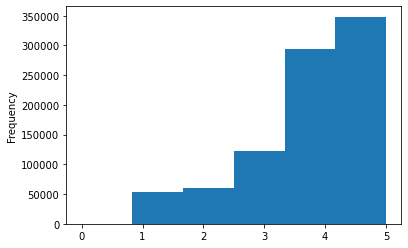

In [444]:
df_reviews['ratings_overall'].plot.hist(bins=6)

### others

In [458]:
rating_li = eval(reviews.loc[0,'ratings']).keys()
rating_li = list(rating_li)
rating_li.remove('overall')
rating_li

['service', 'cleanliness', 'value', 'location', 'sleep_quality', 'rooms']

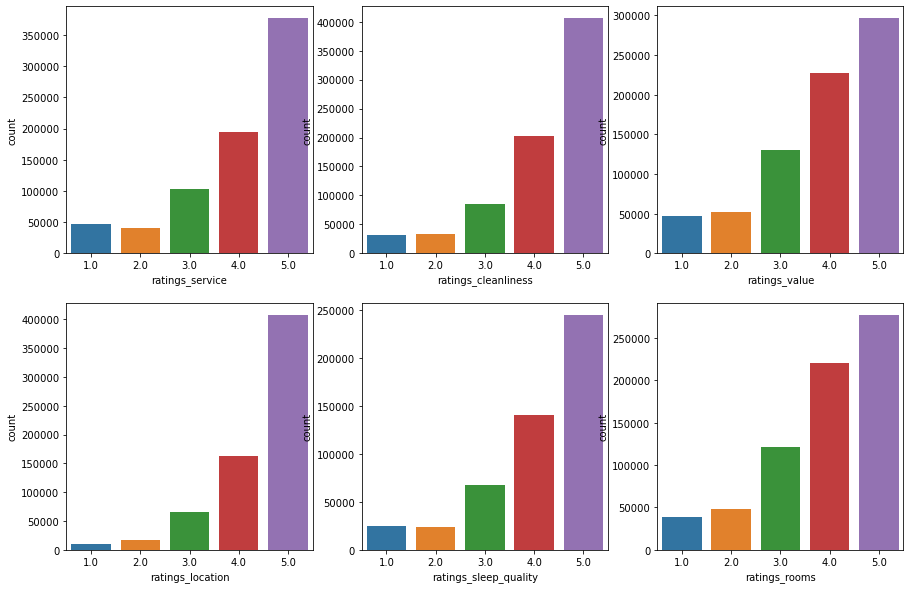

In [461]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for i, col_name in enumerate(rating_li):
    row = i // 3
    col = i % 3
    sns.countplot(data=df_reviews, x='ratings_'+col_name, ax=axes[row, col])
    
plt.show()

## all

In [476]:
# 데이터 형태 보기
rv = reviews.iloc[0]

for col in reviews.columns:
    print(col + "\n" + str(rv[col]) + "\n")

ratings
{'service': 5.0, 'cleanliness': 5.0, 'overall': 5.0, 'value': 5.0, 'location': 5.0, 'sleep_quality': 5.0, 'rooms': 5.0}

title
“Truly is "Jewel of the Upper Wets Side"”

text
Stayed in a king suite for 11 nights and yes it cots us a bit but we were happy with the standard of room, the location and the friendliness of the staff. Our room was on the 20th floor overlooking Broadway and the madhouse of the Fairway Market. Room was quite with no noise evident from the hallway or adjoining rooms. It was great to be able to open windows when we craved fresh rather than heated air. The beds, including the fold out sofa bed, were comfortable and the rooms were cleaned well. Wi-fi access worked like a dream with only one connectivity issue on our first night and this was promptly responded to with a call from the service provider to ensure that all was well. The location close to the 72nd Street subway station is great and the complimentary umbrellas on the drizzly days were greatly appr

- 제목, 내용 토큰화, 긍부정
- 내용과 별점 사이 관계 -> 각 항목별 후기 내용과 길이에 따른 별점 예측 모델?
- 도움된 투표 수와 내용 길이 관계
- 날짜에 따른 변화?
- 모바일 여부에 따른 차이

# 함수: dict_to_cols

In [342]:
# 딕셔너리 값을 가진 컬럼의 각 키 값을 컬럼으로 변환하는 함수

def dict_to_cols(input_df, col_name):
    df = input_df.copy()
    
    # 문자열 형태로 되어 있는 값을 딕셔너리로 변환
    df[col_name] = df[col_name].apply(lambda x : eval(x))
    
    # 딕셔너리 각 키값에 대한 컬럼 생성, 값 할당
    keys = df.loc[0,col_name].keys()
    for key in keys:
        df[col_name+"_"+key] = df[col_name].map(lambda x : x.get(key))
    
    # 기존 컬럼 삭제
    df.drop(columns=col_name, inplace=True)

    return df

## df_offer

In [301]:
df_offer = offerings.copy()
df_offer

,hotel_class,region_id,url,address,id,name
0,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,"{'region': 'NY', 'street-address': '147 West 4...",113317,Casablanca Hotel Times Square
1,5.0,32655,http://www.tripadvisor.com/Hotel_Review-g32655...,"{'region': 'CA', 'street-address': '300 S Dohe...",76049,Four Seasons Hotel Los Angeles at Beverly Hills
2,3.5,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,"{'region': 'NY', 'street-address': '790 Eighth...",99352,Hilton Garden Inn Times Square
3,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,"{'region': 'NY', 'street-address': '152 West 5...",93589,The Michelangelo Hotel
4,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,"{'region': 'NY', 'street-address': '130 West 4...",217616,The Muse Hotel New York
...,...,...,...,...,...,...
4328,5.0,28970,http://www.tripadvisor.com/Hotel_Review-g28970...,"{'region': 'DC', 'street-address': '1201 24th ...",84090,Park Hyatt Washington
4329,5.0,28970,http://www.tripadvisor.com/Hotel_Review-g28970...,"{'region': 'DC', 'street-address': '2800 Penns...",84065,Four Seasons Washington D.C.
4330,4.0,28970,http://www.tripadvisor.com/Hotel_Review-g28970...,"{'region': 'DC', 'street-address': '2121 P Str...",84093,"Palomar Washington DC, a Kimpton Hotel"
4331,4.5,28970,http://www.tripadvisor.com/Hotel_Review-g28970...,"{'region': 'DC', 'street-address': '806 15th S...",235513,Sofitel Washington DC


In [346]:
df_offer = dict_to_cols(offerings, 'address')
df_offer

,hotel_class,region_id,url,id,name,address_region,address_street-address,address_postal-code,address_locality
0,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,113317,Casablanca Hotel Times Square,NY,147 West 43rd Street,10036,New York City
1,5.0,32655,http://www.tripadvisor.com/Hotel_Review-g32655...,76049,Four Seasons Hotel Los Angeles at Beverly Hills,CA,300 S Doheny Dr,90048,Los Angeles
2,3.5,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,99352,Hilton Garden Inn Times Square,NY,790 Eighth Avenue,10019,New York City
3,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,93589,The Michelangelo Hotel,NY,152 West 51st Street,10019,New York City
4,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,217616,The Muse Hotel New York,NY,130 West 46th Street,10036,New York City
...,...,...,...,...,...,...,...,...,...
4328,5.0,28970,http://www.tripadvisor.com/Hotel_Review-g28970...,84090,Park Hyatt Washington,DC,1201 24th Street NW,20037,Washington DC
4329,5.0,28970,http://www.tripadvisor.com/Hotel_Review-g28970...,84065,Four Seasons Washington D.C.,DC,2800 Pennsylvania Ave. NW,20007,Washington DC
4330,4.0,28970,http://www.tripadvisor.com/Hotel_Review-g28970...,84093,"Palomar Washington DC, a Kimpton Hotel",DC,2121 P Street NW,20037,Washington DC
4331,4.5,28970,http://www.tripadvisor.com/Hotel_Review-g28970...,235513,Sofitel Washington DC,DC,806 15th Street NW,20005,Washington DC


### dict_to_cols 함수 steps 참고
- 실행하지 않기!

In [303]:
# address 컬럼값 딕셔너리 형태로 변환
# df_offer["address"] = df_offer["address"].apply(lambda x : eval(x))
# df_offer.head()

,hotel_class,region_id,url,address,id,name
0,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,"{'region': 'NY', 'street-address': '147 West 4...",113317,Casablanca Hotel Times Square
1,5.0,32655,http://www.tripadvisor.com/Hotel_Review-g32655...,"{'region': 'CA', 'street-address': '300 S Dohe...",76049,Four Seasons Hotel Los Angeles at Beverly Hills
2,3.5,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,"{'region': 'NY', 'street-address': '790 Eighth...",99352,Hilton Garden Inn Times Square
3,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,"{'region': 'NY', 'street-address': '152 West 5...",93589,The Michelangelo Hotel
4,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,"{'region': 'NY', 'street-address': '130 West 4...",217616,The Muse Hotel New York


In [318]:
# address 컬럼 각자 생성
# addr = df_offer.loc[0,"address"]

# for key in addr.keys():
#     df_offer[key] = df_offer["address"].map(lambda x : x.get(key))

# df_offer.head()

,hotel_class,region_id,url,address,id,name,region,street-address,postal-code,locality
0,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,"{'region': 'NY', 'street-address': '147 West 4...",113317,Casablanca Hotel Times Square,NY,147 West 43rd Street,10036,New York City
1,5.0,32655,http://www.tripadvisor.com/Hotel_Review-g32655...,"{'region': 'CA', 'street-address': '300 S Dohe...",76049,Four Seasons Hotel Los Angeles at Beverly Hills,CA,300 S Doheny Dr,90048,Los Angeles
2,3.5,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,"{'region': 'NY', 'street-address': '790 Eighth...",99352,Hilton Garden Inn Times Square,NY,790 Eighth Avenue,10019,New York City
3,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,"{'region': 'NY', 'street-address': '152 West 5...",93589,The Michelangelo Hotel,NY,152 West 51st Street,10019,New York City
4,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,"{'region': 'NY', 'street-address': '130 West 4...",217616,The Muse Hotel New York,NY,130 West 46th Street,10036,New York City


In [336]:
# df_offer.drop(columns='address', inplace=True)
# df_offer.head()

,hotel_class,region_id,url,id,name,region,street-address,postal-code,locality
0,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,113317,Casablanca Hotel Times Square,NY,147 West 43rd Street,10036,New York City
1,5.0,32655,http://www.tripadvisor.com/Hotel_Review-g32655...,76049,Four Seasons Hotel Los Angeles at Beverly Hills,CA,300 S Doheny Dr,90048,Los Angeles
2,3.5,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,99352,Hilton Garden Inn Times Square,NY,790 Eighth Avenue,10019,New York City
3,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,93589,The Michelangelo Hotel,NY,152 West 51st Street,10019,New York City
4,4.0,60763,http://www.tripadvisor.com/Hotel_Review-g60763...,217616,The Muse Hotel New York,NY,130 West 46th Street,10036,New York City
